In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


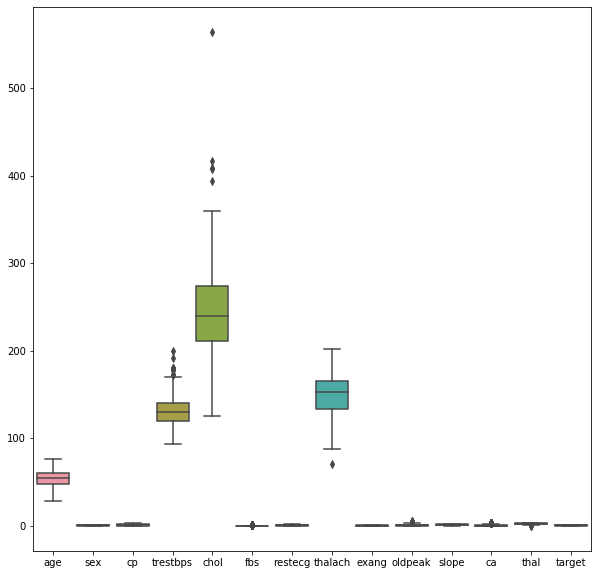

In [4]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [5]:
df.shape

(303, 14)

## outlier treatment

In [6]:
def trestbps_(x):
    if x>170:
        x=np.nan
    else:
        x=x
    return x
def chol_(x):
    if x>370:
        x=np.nan
    else:
        x=x
    return x
def thalach_(x):
    if x<100:
        x=np.nan
    else:
        x=x
    return x

In [7]:
temp = df["trestbps"]
temp= temp.apply(lambda x:trestbps_(x))
temp.dropna(inplace=True)
mean_= temp.mean()
df["trestbps"]= df["trestbps"].apply(lambda x:trestbps_(x))
df["trestbps"].fillna(mean_,inplace=True)

In [8]:
temp = df["chol"]
temp= temp.apply(lambda x:chol_(x))
temp.dropna(inplace=True)
mean_= temp.mean()
df["chol"]= df["chol"].apply(lambda x:chol_(x))
df["chol"].fillna(mean_,inplace=True)

In [9]:
temp = df["thalach"]
temp= temp.apply(lambda x:thalach_(x))
temp.dropna(inplace=True)
mean_= temp.mean()
df["thalach"]= df["thalach"].apply(lambda x:thalach_(x))
df["thalach"].fillna(mean_,inplace=True)

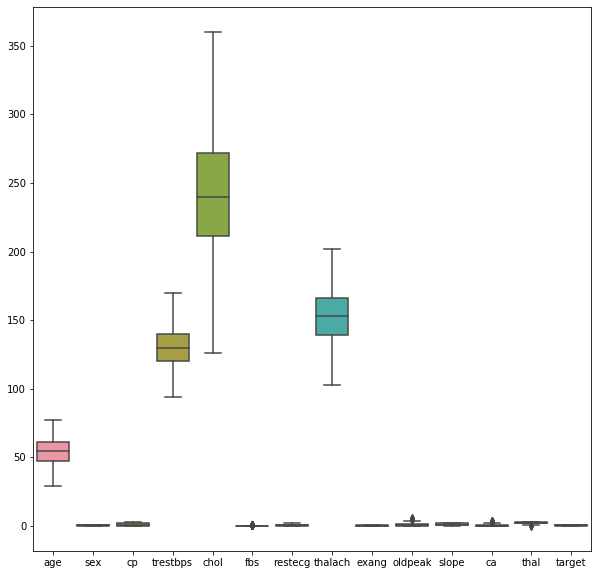

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

### Checking class balance

In [11]:
df_class_balance= pd.DataFrame(df["target"].value_counts()*100/df.shape[0])

In [12]:
df_class_balance.rename( columns = {"target":"percentage"}, inplace=True)

In [13]:
df_class_balance.reset_index(inplace=True)

In [14]:
df_class_balance.rename( columns = {"index":"class"}, inplace=True)

In [15]:
df_class_balance      

,class,percentage
0,1,54.455446
1,0,45.544554


## EDA

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.000000,354.0,0,1,163.0,1,0.6,2,0,2,1
5,57,1,0,140.000000,192.0,0,1,148.0,0,0.4,1,0,1,1
6,56,0,1,140.000000,294.0,0,0,153.0,0,1.3,1,0,2,1
7,44,1,1,120.000000,263.0,0,1,173.0,0,0.0,2,0,3,1
8,52,1,2,130.095238,199.0,1,1,162.0,0,0.5,2,0,3,1
9,57,1,2,150.000000,168.0,0,1,174.0,0,1.6,2,0,2,1


In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

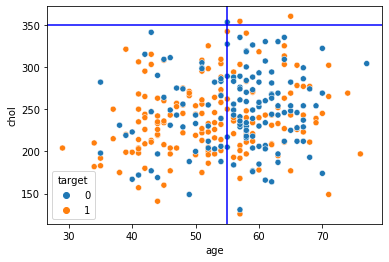

In [20]:
sns.scatterplot(x="age",y="chol",hue="target",data=df)
plt.axvline(x=55, color="b", linestyle='solid')
plt.axhline(y=350, color="b", linestyle='solid')

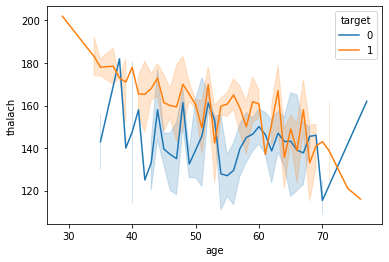

In [21]:
sns.lineplot(x="age",y= "thalach", hue="target", data=df)

## plain logostic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix

In [23]:
#train_test_split
x=df.drop(columns=["target"])
y=df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=51)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [24]:
log_model = LogisticRegression(max_iter=1000)

In [25]:
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_train_pred= log_model.predict(x_train)

In [27]:
y_train_pred_proba = log_model.predict_proba(x_train)

In [28]:
confusion_matrix(y_train,y_train_pred)

array([[ 85,  23],
       [ 11, 123]], dtype=int64)

In [29]:
p=[]
r=[]
def all_scores(y_true,y_pred):
    precision= precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1_score = fbeta_score(y_true,y_pred,beta=1)
    print("Precision:{} Recall:{} f1 score:{}".format(precision,recall,f1_score))
    p.append(precision)
    r.append(recall)

In [30]:
all_scores(y_train,y_train_pred)   #results for plain logistic regression trainingset

Precision:0.8424657534246576 Recall:0.917910447761194 f1 score:0.8785714285714287


In [31]:
y_test_pred = log_model.predict(x_test)

In [32]:
all_scores(y_test,y_test_pred)

Precision:0.7941176470588235 Recall:0.8709677419354839 f1 score:0.8307692307692308


In [33]:
def threshold_change(predicted_proba,threshold):
    l=[]
    for i in range(0,len(predicted_proba)):
        if predicted_proba[i][0] >=threshold:
            l.append(0)
        else:
            l.append(1)
    y_pred_proba= np.array(l)
    return y_pred_proba

In [34]:
threshold_change(y_train_pred_proba,0.5)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [35]:
thrsh = np.arange(1,10)/10
for j in thrsh:
    print("threshold:{}".format(j))
    y_train_pred_probs = threshold_change(y_train_pred_proba,j)
    all_scores(y_train,y_train_pred_probs)

threshold:0.1
Precision:0.9622641509433962 Recall:0.3805970149253731 f1 score:0.5454545454545454
threshold:0.2
Precision:0.9285714285714286 Recall:0.582089552238806 f1 score:0.7155963302752294
threshold:0.3
Precision:0.9122807017543859 Recall:0.7761194029850746 f1 score:0.8387096774193548
threshold:0.4
Precision:0.8676470588235294 Recall:0.8805970149253731 f1 score:0.874074074074074
threshold:0.5
Precision:0.8424657534246576 Recall:0.917910447761194 f1 score:0.8785714285714287
threshold:0.6
Precision:0.802547770700637 Recall:0.9402985074626866 f1 score:0.865979381443299
threshold:0.7
Precision:0.7839506172839507 Recall:0.9477611940298507 f1 score:0.8581081081081082
threshold:0.8
Precision:0.7456647398843931 Recall:0.9626865671641791 f1 score:0.8403908794788273
threshold:0.9
Precision:0.6947368421052632 Recall:0.9850746268656716 f1 score:0.8148148148148148


## GridsearchCV on log model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {"C":[i for i in np.arange(1,11)/10], "class_weight":[None,"balanced"]}

In [38]:
gs_log = GridSearchCV(log_model, param_grid=parameters, cv=10)

In [39]:
gs_log.fit(x_train,y_train)

C:\Users\Pushkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'class_weight': [None, 'balanced']})

In [40]:
gs_log.best_estimator_

LogisticRegression(C=0.2, class_weight='balanced', max_iter=1000)

In [41]:
log_model= LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
log_model.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

In [43]:
y_pred_train = log_model.predict(x_train)
y_pred_test = log_model.predict(x_test)
precision_train= precision_score(y_train,y_pred_train)
recall_train=recall_score(y_train,y_pred_train)
precision_test=precision_score(y_test,y_pred_test)
recall_test=recall_score(y_test,y_pred_test)
print("train")
print(f"precision:{precision_train}")
print(f"recall:{recall_train}")
print("\n")
print("test")
print(f"precision:{precision_test}")
print(f"recall:{recall_test}")

train
precision:0.8378378378378378
recall:0.9253731343283582


test
precision:0.8
recall:0.9032258064516129


## lets try standardizing

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
y_train_pred= log_model.predict(x_train)
y_test_pred = log_model.predict(x_test)

In [47]:
all_scores(y_train,y_train_pred) 

Precision:0.7005347593582888 Recall:0.9776119402985075 f1 score:0.8161993769470405


In [48]:
all_scores(y_test,y_test_pred)

Precision:0.6818181818181818 Recall:0.967741935483871 f1 score:0.8


In [49]:
# performance is getting bad after standardizing, not a good idea

## AUC-ROC CURVE

In [50]:
y_test_proba = log_model.predict_proba(x_test)

from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, [a[1] for a in y_train_pred_proba])
fprte, tprte, thresholdste = roc_curve(y_test, [j[1] for j in y_test_proba])

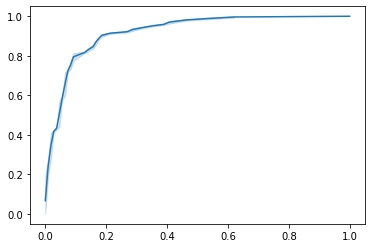

In [52]:
sns.lineplot(x=fpr, y=tpr)

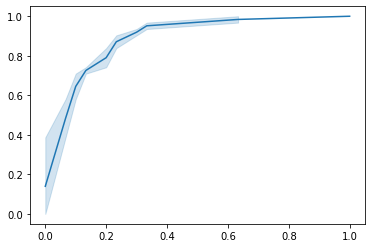

In [53]:
sns.lineplot(x=fprte, y=tprte)

In [54]:
df_roc1= pd.DataFrame(thresholds, columns=["thresholds train"])

In [55]:
df_roc1["tpr"] = tpr

In [56]:
df_roc1["fpr"] = fpr

In [57]:
df_roc1

,thresholds train,tpr,fpr
0,1.995522,0.000000,0.000000
1,0.995522,0.007463,0.000000
2,0.965232,0.194030,0.000000
3,0.962604,0.194030,0.009259
4,0.937558,0.283582,0.009259
5,0.931973,0.283582,0.018519
6,0.888658,0.410448,0.018519
7,0.888626,0.410448,0.027778
8,0.883299,0.425373,0.027778
9,0.878619,0.425373,0.037037


In [58]:
df_roc2= pd.DataFrame(thresholdste, columns=["thresholds test"])

In [59]:
df_roc2["tpr"] = tprte

In [60]:
df_roc2["fpr"] = fprte

In [61]:
df_roc2

,thresholds test,tpr,fpr
0,1.994698,0.000000,0.000000
1,0.994698,0.032258,0.000000
2,0.974147,0.387097,0.000000
3,0.972134,0.387097,0.066667
4,0.941434,0.580645,0.066667
5,0.938162,0.580645,0.100000
6,0.893191,0.709677,0.100000
7,0.892211,0.709677,0.133333
8,0.885299,0.741935,0.133333
9,0.847289,0.741935,0.200000


## 0.58 best threshold with recall : (tpr) = 0.83 , precision = 1-(fpr) = 0.87

In [62]:
thrsh = thresholds[1:len(thresholds)-1]
for j in thrsh:
    print("threshold:{}".format(j))
    y_train_pred_probs = threshold_change(y_train_pred_proba,j)
    all_scores(y_train,y_train_pred_probs)

threshold:0.9955221378093251
Precision:0.5583333333333333 Recall:1.0 f1 score:0.7165775401069518
threshold:0.96523229102314
Precision:0.6203703703703703 Recall:1.0 f1 score:0.7657142857142858
threshold:0.9626037552237743
Precision:0.6203703703703703 Recall:1.0 f1 score:0.7657142857142858
threshold:0.937557982104052
Precision:0.6504854368932039 Recall:1.0 f1 score:0.788235294117647
threshold:0.931973019853308
Precision:0.6600985221674877 Recall:1.0 f1 score:0.7952522255192879
threshold:0.8886578934316371
Precision:0.6984126984126984 Recall:0.9850746268656716 f1 score:0.8173374613003096
threshold:0.8886260680585361
Precision:0.6984126984126984 Recall:0.9850746268656716 f1 score:0.8173374613003096
threshold:0.8832985734283567
Precision:0.7021276595744681 Recall:0.9850746268656716 f1 score:0.8198757763975155
threshold:0.8786188225436611
Precision:0.7058823529411765 Recall:0.9850746268656716 f1 score:0.8224299065420562
threshold:0.8752494946806437
Precision:0.7058823529411765 Recall:0.98507

In [63]:
thresholds

array([1.99552214e+00, 9.95522138e-01, 9.65232291e-01, 9.62603755e-01,
       9.37557982e-01, 9.31973020e-01, 8.88657893e-01, 8.88626068e-01,
       8.83298573e-01, 8.78618823e-01, 8.75249495e-01, 8.70536730e-01,
       8.05977762e-01, 8.03778465e-01, 7.93071448e-01, 7.92977519e-01,
       7.51761932e-01, 7.46768164e-01, 7.41810042e-01, 7.38228377e-01,
       7.09541011e-01, 7.01723569e-01, 6.87559982e-01, 6.76215665e-01,
       6.75130773e-01, 6.67466004e-01, 6.54898585e-01, 6.41705276e-01,
       6.34273406e-01, 6.23318461e-01, 6.23027806e-01, 6.10138735e-01,
       5.99533305e-01, 5.85939101e-01, 5.68273323e-01, 5.49706208e-01,
       5.38225096e-01, 5.17603951e-01, 4.42205187e-01, 4.35335931e-01,
       4.22417516e-01, 4.00363673e-01, 3.38543568e-01, 3.16629151e-01,
       2.36407519e-01, 2.28356138e-01, 2.10729393e-01, 2.09703378e-01,
       2.08019220e-01, 1.89903193e-01, 1.68605680e-01, 1.59086918e-01,
       1.04468245e-01, 9.93563336e-02, 7.74125387e-02, 7.50087483e-02,
      

In [64]:
p=[]
r=[]
def all_scores(y_true,y_pred):
    precision= precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1_score = fbeta_score(y_true,y_pred,beta=1)
    print("Precision:{}  Recall:{}  f1 score:{}".format(precision,recall,f1_score))
    p.append(precision)
    r.append(recall)

In [65]:
thrsh = thresholds[1:len(thresholds)-1]
for j in thrsh:
    print("threshold:{}".format(j))
    y_train_pred_probs = threshold_change(y_train_pred_proba,j)
    all_scores(y_train,y_train_pred_probs)

threshold:0.9955221378093251
Precision:0.5583333333333333  Recall:1.0  f1 score:0.7165775401069518
threshold:0.96523229102314
Precision:0.6203703703703703  Recall:1.0  f1 score:0.7657142857142858
threshold:0.9626037552237743
Precision:0.6203703703703703  Recall:1.0  f1 score:0.7657142857142858
threshold:0.937557982104052
Precision:0.6504854368932039  Recall:1.0  f1 score:0.788235294117647
threshold:0.931973019853308
Precision:0.6600985221674877  Recall:1.0  f1 score:0.7952522255192879
threshold:0.8886578934316371
Precision:0.6984126984126984  Recall:0.9850746268656716  f1 score:0.8173374613003096
threshold:0.8886260680585361
Precision:0.6984126984126984  Recall:0.9850746268656716  f1 score:0.8173374613003096
threshold:0.8832985734283567
Precision:0.7021276595744681  Recall:0.9850746268656716  f1 score:0.8198757763975155
threshold:0.8786188225436611
Precision:0.7058823529411765  Recall:0.9850746268656716  f1 score:0.8224299065420562
threshold:0.8752494946806437
Precision:0.7058823529411

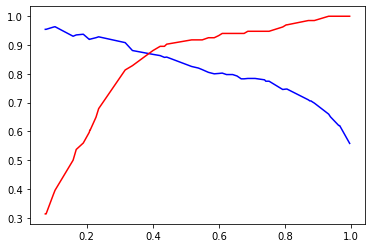

In [66]:
sns.lineplot(x=np.array(thrsh),y=np.array(p) , color="b")
sns.lineplot(x=np.array(thrsh),y=np.array(r) , color="r")

## Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc =  DecisionTreeClassifier()

In [69]:
pltr=[]
rltr=[]
plte=[]
rlte=[]
max_depth_ = np.arange(1,11)
for d in max_depth_:
    dtc = DecisionTreeClassifier(max_depth=d)
    dtc.fit(x_train,y_train)
    y_train_pred= dtc.predict(x_train)
    precisionlist_element_train = precision_score(y_train,y_train_pred)
    recalllist_element_train = recall_score(y_train,y_train_pred)
    pltr.append(precisionlist_element_train)
    rltr.append(recalllist_element_train)
    print(f"train{d}")
    all_scores(y_train,y_train_pred)
    y_test_pred= dtc.predict(x_test)
    precision_element_test = precision_score(y_test,y_test_pred)
    recalllist_element_test = recall_score(y_test,y_test_pred)
    plte.append(precision_element_test)
    rlte.append(recalllist_element_test)
    print(f"test{d}")
    all_scores(y_test,y_test_pred)
    print("\n")

train1
Precision:0.7984496124031008  Recall:0.7686567164179104  f1 score:0.7832699619771862
test1
Precision:0.7419354838709677  Recall:0.7419354838709677  f1 score:0.7419354838709677


train2
Precision:0.7206703910614525  Recall:0.9626865671641791  f1 score:0.8242811501597443
test2
Precision:0.6739130434782609  Recall:1.0  f1 score:0.8051948051948052


train3
Precision:0.8818897637795275  Recall:0.835820895522388  f1 score:0.8582375478927202
test3
Precision:0.8333333333333334  Recall:0.8064516129032258  f1 score:0.819672131147541


train4
Precision:0.8905109489051095  Recall:0.9104477611940298  f1 score:0.9003690036900369
test4
Precision:0.7352941176470589  Recall:0.8064516129032258  f1 score:0.7692307692307693


train5
Precision:0.9477611940298507  Recall:0.9477611940298507  f1 score:0.9477611940298507
test5
Precision:0.7  Recall:0.6774193548387096  f1 score:0.6885245901639343


train6
Precision:0.9637681159420289  Recall:0.9925373134328358  f1 score:0.9779411764705882
test6
Precision

In [70]:
all_scores(y_train,y_train_pred)

Precision:1.0  Recall:1.0  f1 score:1.0


In [71]:
y_test_pred= dtc.predict(x_test)

In [72]:
all_scores(y_test,y_test_pred)

Precision:0.8214285714285714  Recall:0.7419354838709677  f1 score:0.7796610169491526


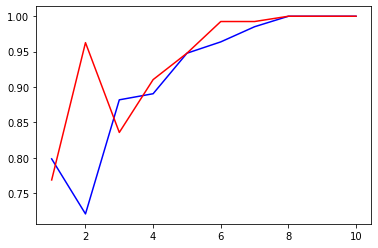

In [73]:
sns.lineplot(x=max_depth_,y=pltr,color="b")
sns.lineplot(x=max_depth_,y=rltr,color="r")

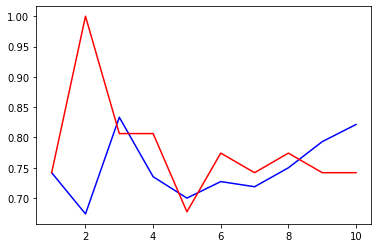

In [74]:
sns.lineplot(x=max_depth_,y=plte,color="b")
sns.lineplot(x=max_depth_,y=rlte,color="r")

# GridsearchCV

In [75]:
parameters={"criterion":["gini","entropy"], "max_depth":[i for i in np.arange(1,16)]}

In [76]:
from sklearn.model_selection import GridSearchCV 

In [77]:
gs = GridSearchCV(dtc, param_grid =parameters, cv=10, n_jobs=-1)

In [78]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]})

In [79]:
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
gs.best_score_

0.7853333333333333

In [82]:
dtc =  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [83]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [84]:
y_test_pred = dtc.predict(x_test)

In [85]:
precision = precision_score(y_test,y_test_pred)

In [86]:
precision

0.8125

In [87]:
recall = recall_score(y_test,y_test_pred)

In [88]:
recall

0.8387096774193549

## 3 is the max_depth, where recall is 0.83 and precision is 0.81.

# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [90]:
#train_test_split
x=df.drop(columns=["target"])
y=df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=51)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [91]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
parameters={"criterion":["gini","entropy"], "max_depth":[i for i in np.arange(1,16)]}

In [93]:
gs = GridSearchCV(RFC, param_grid = parameters, cv=10 ,n_jobs=-1)

In [94]:
parameters

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

In [95]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]})

In [96]:
gs.best_score_

0.8425

In [97]:
gs.best_estimator_

RandomForestClassifier(max_depth=13)

In [98]:
RFC =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=11)

In [100]:
y_pred_train = RFC.predict(x_train)
y_pred_test = RFC.predict(x_test)
precision_train= precision_score(y_train,y_pred_train)
recall_train=recall_score(y_train,y_pred_train)
precision_test=precision_score(y_test,y_pred_test)
recall_test=recall_score(y_test,y_pred_test)
print("train")
print(f"precision:{precision_train}")
print(f"recall:{recall_train}")
print("\n")
print("test")
print(f"precision:{precision_test}")
print(f"recall:{recall_test}")

train
precision:1.0
recall:1.0


test
precision:0.8
recall:0.9032258064516129


# Applying gradient boosting classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
XG = GradientBoostingClassifier()

In [103]:
XG.fit(x_train,y_train)

GradientBoostingClassifier()

In [104]:
y_pred_test= XG.predict(x_test)

In [105]:
precision = precision_score(y_test,y_pred_test)

In [106]:
precision

0.8064516129032258

In [107]:
recall = recall_score(y_test,y_pred_test)

In [108]:
recall

0.8064516129032258

In [109]:
params = {"max_depth":[i for i in np.arange(1,10)],"criterion":["friedman_mse", "mse", "mae"],"learning_rate":[0.001,0.01,0.1,0.2]}

In [110]:
GS = GridSearchCV(XG, param_grid = params , n_jobs=-1)

In [111]:
GS.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [112]:
GS.best_estimator_

GradientBoostingClassifier(max_depth=1)

In [114]:
XG = GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
XG.fit(x_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5)

In [116]:
precision = precision_score(y_test,y_pred_test)
recall = recall_score(y_test,y_pred_test)

In [117]:
print(precision)
print(recall)

0.8064516129032258
0.8064516129032258
